# Plots for data section 
The following plots will be presented: 
- Number of individuals by gender
- Number of individuals by socio-economic level by attribute STRATUM
- Number of individuals by gender&socio-economic level


- Distribution of grades by gender (before and after college)
- Distribution of grades by socio-economic-level (before and after college)
- Distribution of grades by gender&socio-economic level (before and after college)


- Matrix showing the Pearson correlation between grades (before), grades (after), gender, socio-economic level
- Scatter-plot showing the correlation between grades before vs after college. 

In [14]:
# Loading data and packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
# from scipy import stats
import scipy.stats as stats
import random

def setup_mpl():
    mpl.rcParams["font.family"] = "Helvetica Neue"
    mpl.rcParams["font.size"] = 11
    mpl.rcParams["figure.figsize"] = (7,4)
    mpl.rcParams["figure.dpi"] = 200
setup_mpl()

df = pd.read_csv("df_sum_score_standardized.csv")


In [15]:
df

,Unnamed: 0,GENDER,STRATUM,CR_S11,CC_S11,ENG_S11,CR_PRO,CC_PRO,ENG_PRO,COL_GRADE_AVG_org,HI_GRADE_AVG_org,GENDER_bin,COL_GRADE_AVG,HI_GRADE_AVG
0,0,F,Stratum 4,81,61,82,93,71,93,85.666667,74.666667,1,0.995599,1.371666
1,1,F,Stratum 5,75,66,88,38,86,98,74.000000,76.333333,1,0.484028,1.540112
2,2,M,Stratum 2,49,38,42,1,18,43,20.666667,43.000000,0,-1.854585,-1.828806
3,3,F,Stratum 2,55,51,73,35,76,80,63.666667,59.666667,1,0.030921,-0.144347
4,4,M,Stratum 4,65,76,92,94,98,100,97.333333,77.666667,0,1.507171,1.674869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12406,12406,M,Stratum 2,69,70,81,71,86,87,81.333333,73.333333,0,0.805587,1.236910
12407,12407,M,Stratum 2,57,61,53,39,44,11,31.333333,57.000000,0,-1.386863,-0.413860
12408,12408,M,Stratum 2,69,75,58,88,90,81,86.333333,67.333333,0,1.024832,0.630504
12409,12409,F,Stratum 3,69,64,52,80,51,8,46.333333,61.666667,1,-0.729128,0.057788


## Number of individuals by gender

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

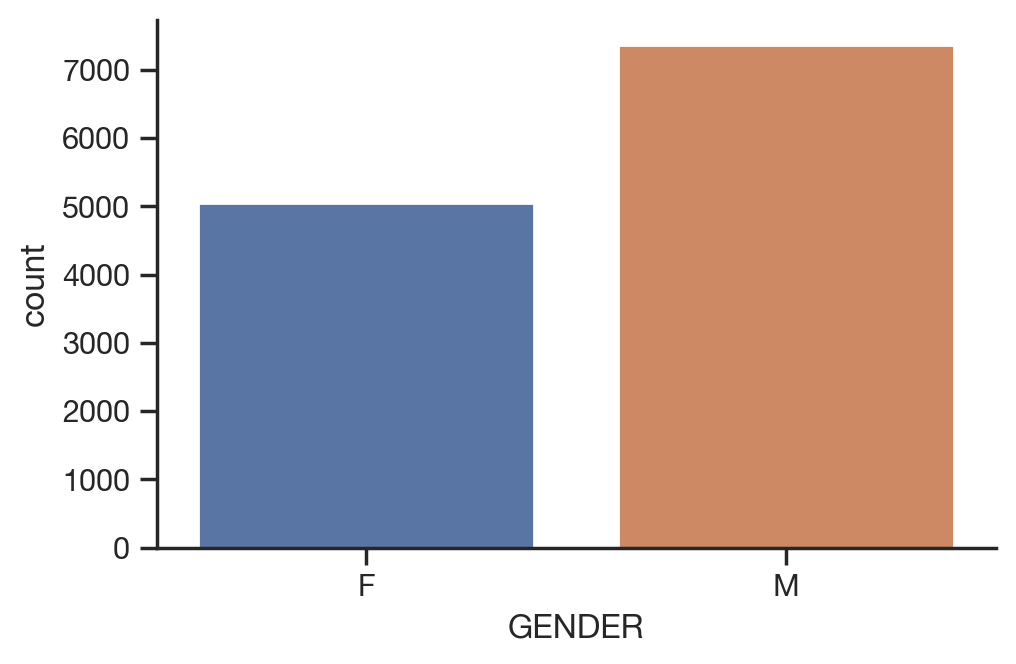

In [16]:
g = sns.catplot(x='GENDER', data=df, kind='count', legend=True)
g.fig.set_size_inches(5, 3)

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)

# iterate through the axes containers
for c in ax.containers:
    labels = [f'{(v.get_height()):.1f}' for v in c]

    ax.bar_label(c, labels=labels, label_type='edge', fontsize=8)
ax.set_xlabel('', fontdict=None, labelpad=None)
ax.set_ylabel('Frequency', fontdict=None, labelpad=None)
ax.set_xticklabels(['Female','Male'])
ax.xaxis.set_tick_params(labelsize=11)
ax.yaxis.set_tick_params(labelsize=8)

#TODO TITLE

## Number of individuals by socio-economic level by attribute STRATUM

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

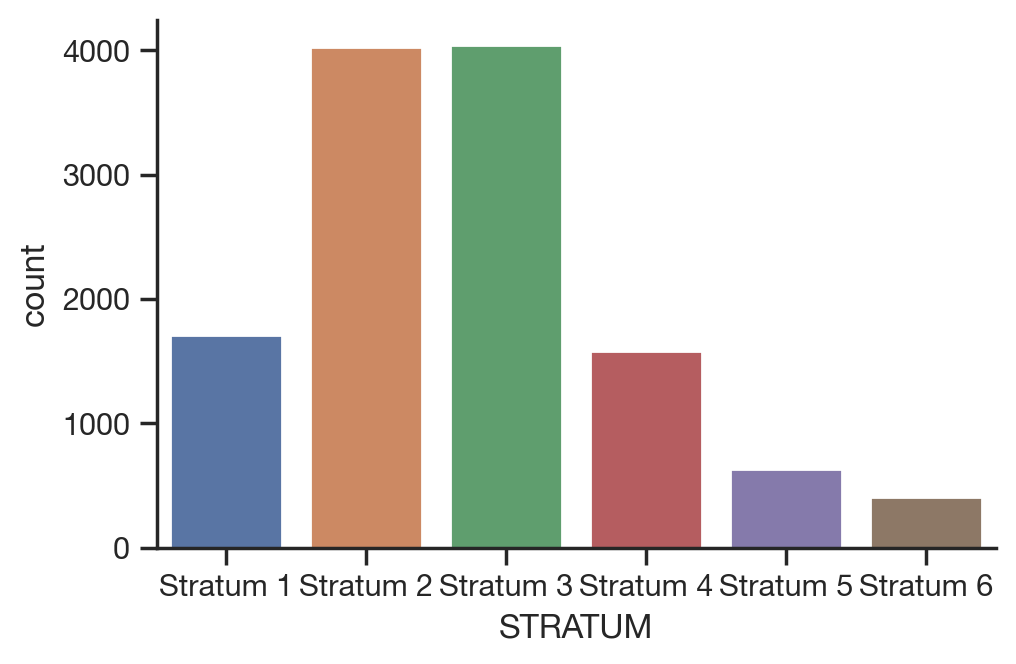

In [17]:
g = sns.catplot(x="STRATUM", kind="count",   data=df, legend=True, order=['Stratum 1','Stratum 2','Stratum 3','Stratum 4','Stratum 5','Stratum 6'])
g.fig.set_size_inches(5, 3)

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)

# iterate through the axes containers
for c in ax.containers:
    labels = [f'{(v.get_height()):.1f}' for v in c]

    ax.bar_label(c, labels=labels, label_type='edge', fontsize=8)
ax.set_xlabel('Socioeconomic levels', fontdict=None, labelpad=None)
ax.set_ylabel('Frequency', fontdict=None, labelpad=None)
ax.xaxis.set_tick_params(labelsize=8)
ax.yaxis.set_tick_params(labelsize=8)

#TODO TITLE

*added quantiles*
*TODO: same axis*

/Users/gabriellakierulff/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/Users/gabriellakierulff/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)
/Users/gabriellakierulff/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)
/Users/gabriellakierulff/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations

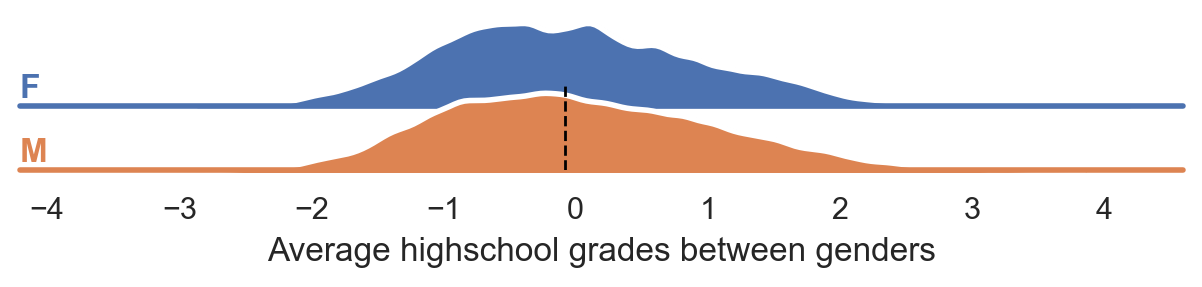

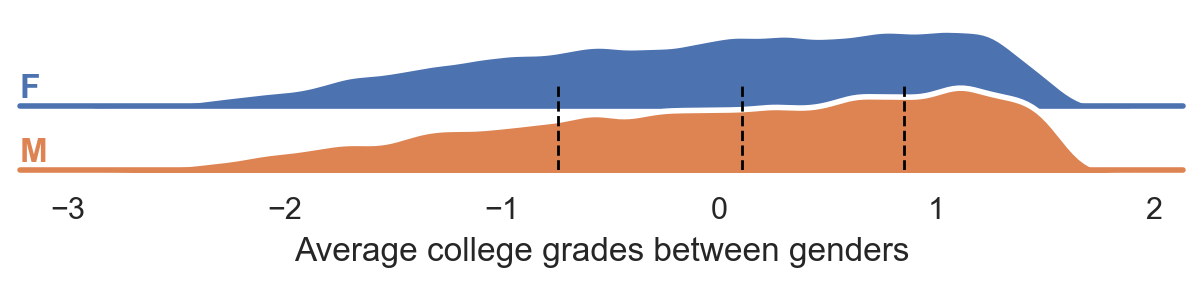

In [20]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

df = pd.read_csv("df_sum_score_standardized.csv")

def Ridgeline_dists(df,x, metric="",plot_label=""):
    df_temp = df.copy()
    x = x 
    g = df_temp.GENDER
    df_kat = pd.DataFrame(dict(x=x, g=g))
    df_kat_order = df_kat.groupby(["g"]).count()
    df_kat_order = df_kat_order.sort_values(by="x", ascending=False)

    # Initialize the FacetGrid object
    pal = sns.cubehelix_palette(10, rot=-0.25, light=0.7)
    g = sns.FacetGrid(
        df_kat,
        row="g",
        hue="g",
        aspect=15,
        height=0.5,
        # palette=pal # Denne gør den i de 2 blå farver
    )

    # Draw the densities in a few steps
    g.map(sns.kdeplot, "x", bw_adjust=0.5, clip_on=False, fill=True, alpha=1, linewidth=1.5)
    g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=0.5)
    g.map(plt.axhline, y=0, lw=2, clip_on=False)
    

    # Define and use a simple function to label the plot in axes coordinates
    def label(x, color, label):
        ax = plt.gca()
        ax.text(
            0,
            0.2,
            label,
            fontweight="bold",
            color=color,
            ha="left",
            va="center",
            transform=ax.transAxes
        )

    g.map(label, "x")

    g.set_xlabels(plot_label)

    # Set the subplots to overlap
    g.fig.subplots_adjust(hspace=-0.25)

    # Remove axes details that don't play well with overlap
    g.set_titles("")
    g.set(yticks=[])
    g.despine(bottom=True, left=True)
    
    
    
    

Ridgeline_dists(df,x=df.HI_GRADE_AVG,plot_label='Average highschool grades between genders')
plt.axvline(x=df.HI_GRADE_AVG.median(),
            color='black',
            ls='--', 
            lw=1)
Ridgeline_dists(df,x=df.COL_GRADE_AVG,plot_label='Average college grades between genders')
plt.axvline(x=df.COL_GRADE_AVG.median(),
            color='black',
            ls='--', 
            lw=1)
plt.axvline(x=np.quantile(df.COL_GRADE_AVG, .25),
            color='black',
            ls='--', 
            lw=1)
plt.axvline(x=np.quantile(df.COL_GRADE_AVG, .75),
            color='black',
            ls='--', 
            lw=1)
plt.show()


## Histograms of females' and males' average grades in highschool

Text(0.5, 0, 'men')

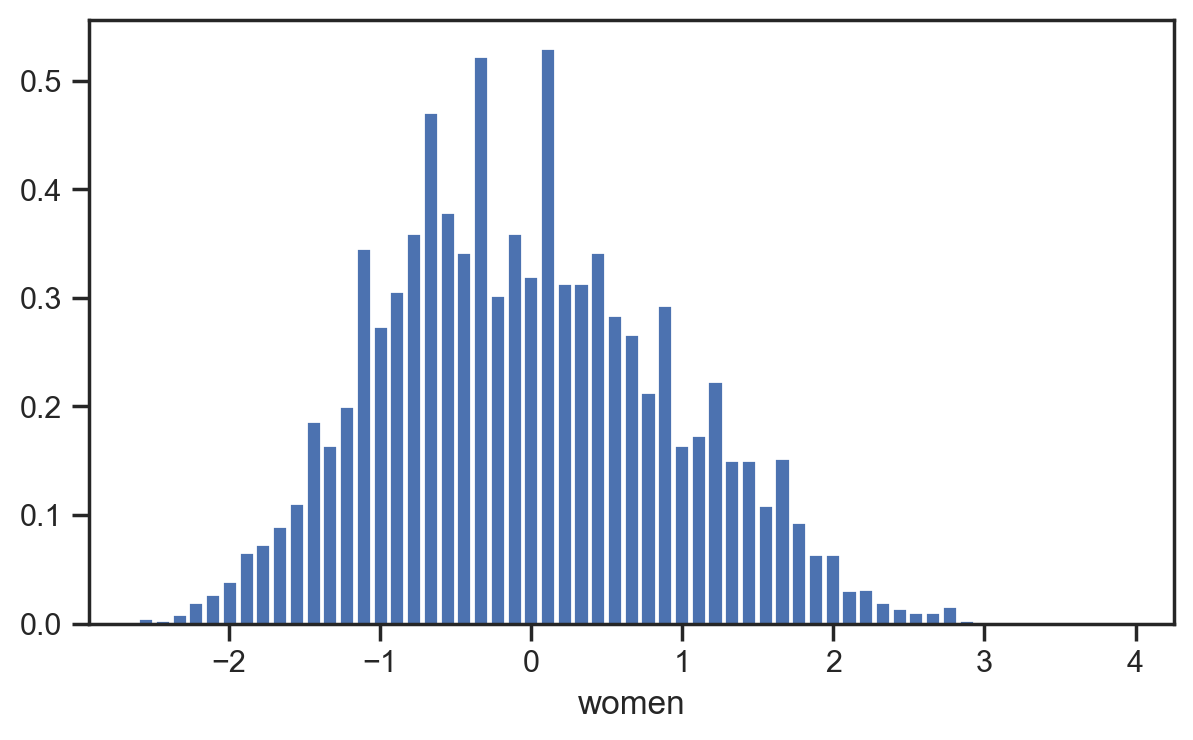

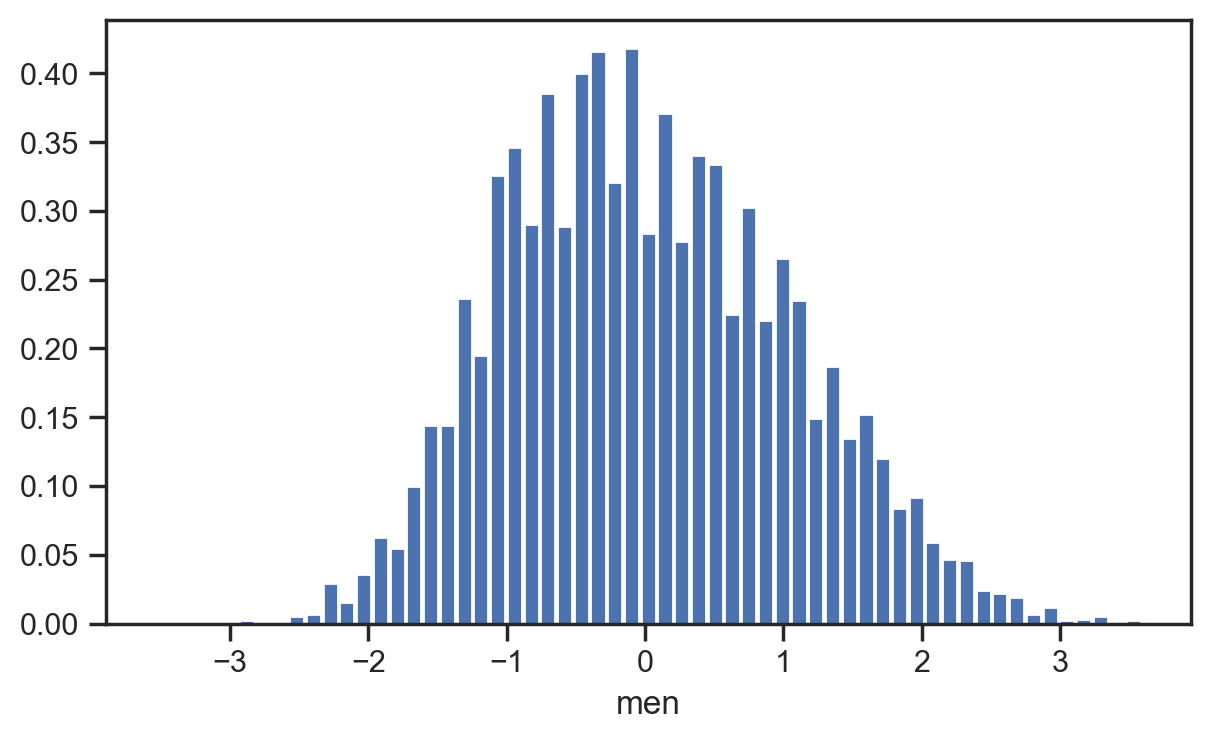

In [21]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style='ticks')

df = pd.read_csv("df_sum_score_standardized.csv")
# df_temp = df.HI_GRADE_AVG.sort_values(ascending=False, inplace=False, kind='quicksort')

#Histogram for women
women = df[df.GENDER=='F'][['GENDER','HI_GRADE_AVG']]
bins = np.linspace(min(women.HI_GRADE_AVG),max(women.HI_GRADE_AVG), 60)
histwomen, edges = np.histogram(women.HI_GRADE_AVG, bins=bins, density=True)
x = (edges[1:]+edges[:-1])/2
width=bins[1]-bins[0]
fig,ax = plt.subplots()
ax.bar(x,histwomen,width=width*0.9)
ax.set_xlabel('women')

#Histgram for men
men = df[df.GENDER=='M'][['GENDER','HI_GRADE_AVG']]
bins = np.linspace(min(men.HI_GRADE_AVG),max(men.HI_GRADE_AVG), 60)
histmen, edges = np.histogram(men.HI_GRADE_AVG, bins=bins, density=True)
x = (edges[1:]+edges[:-1])/2
width=bins[1]-bins[0]
fig,ax = plt.subplots()
ax.bar(x,histmen,width=width*0.9)
ax.set_xlabel('men')



## 

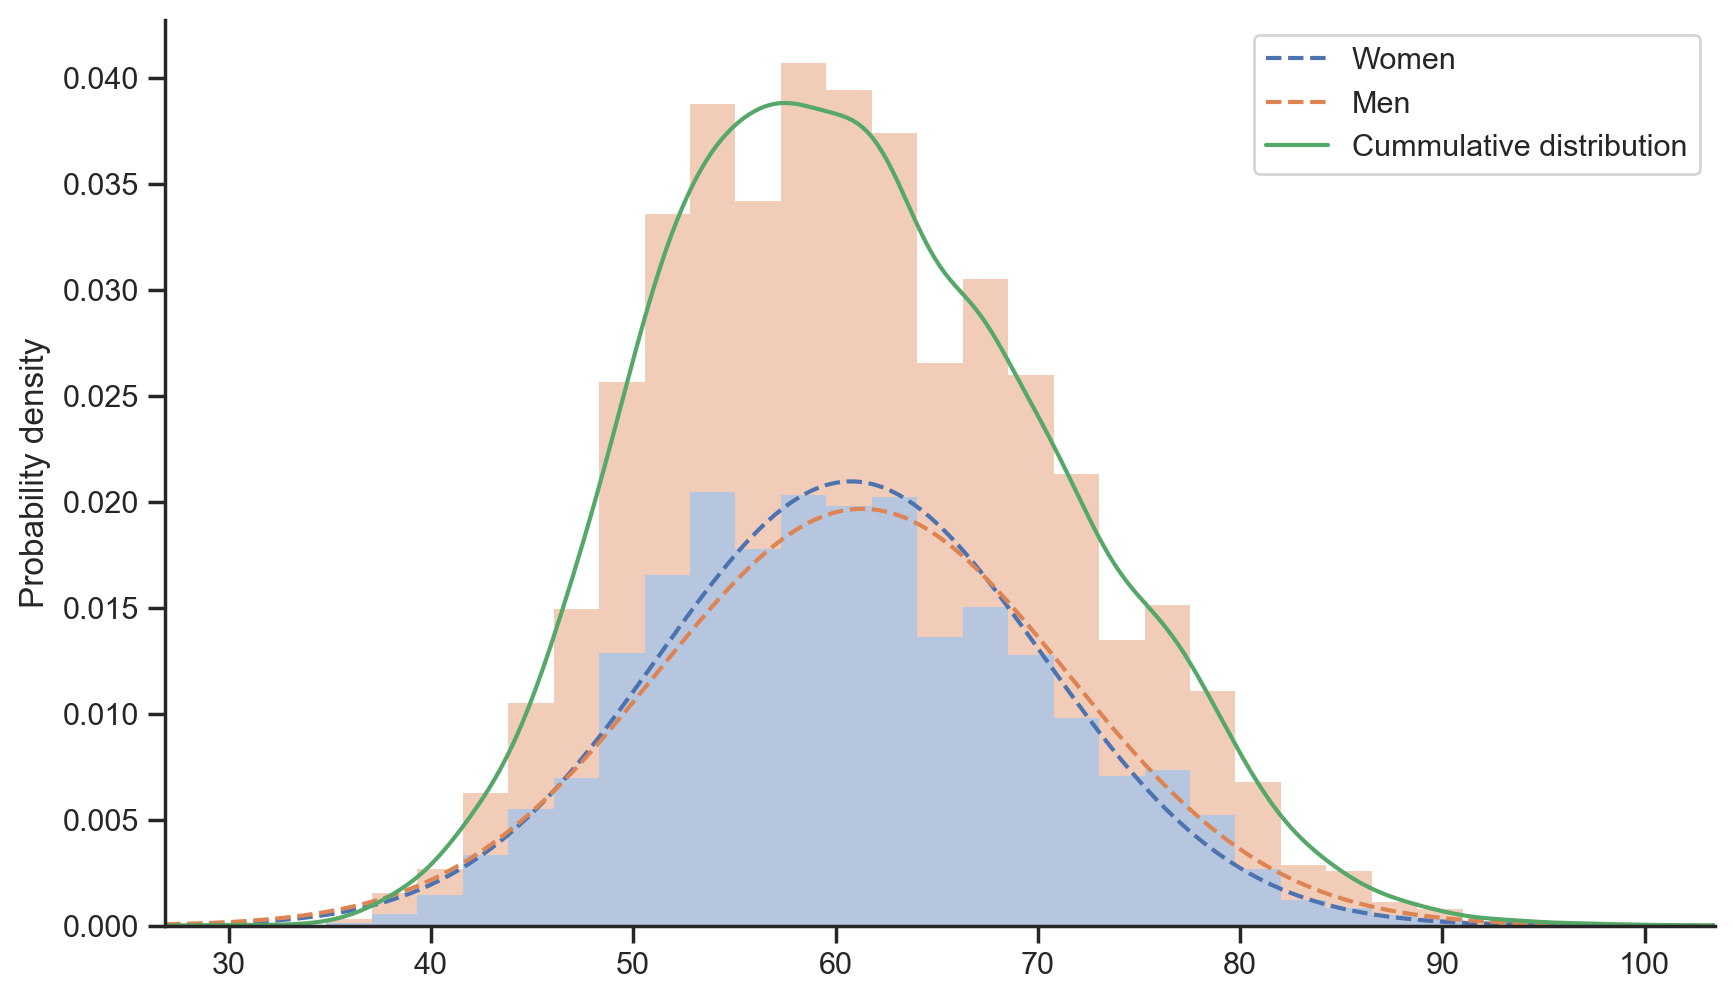

In [9]:

# parameterise our distributions
# d1 = sps.norm(women.HI_GRADE_AVG.mean(),women.HI_GRADE_AVG.std())
# d2 = sps.norm(men.HI_GRADE_AVG.mean(),men.HI_GRADE_AVG.std())

# sample values from above distributions
# random variates from d1 and d2
# y1 = d1.rvs(len(women.HI_GRADE_AVG))
# y2 = d2.rvs(len(women.HI_GRADE_AVG))

d1 = women.HI_GRADE_AVG
d2 = men.HI_GRADE_AVG

y1 = women['HI_GRADE_AVG'].sample(n=len(women.HI_GRADE_AVG), random_state=1)
y2 = men['HI_GRADE_AVG'].sample(n=len(women.HI_GRADE_AVG), random_state=1)

# combine mixture
ys = np.concatenate([y1, y2])

# create new figure with size given explicitly
plt.figure(figsize=(10, 6))

# add histogram showing individual components
# plt.hist([y1, y2], 51, histtype='barstacked', density=True, alpha=0.4, edgecolor='none')
plt.hist([y1, y2], 31, histtype='barstacked', density=True, alpha=0.4, edgecolor='none')

# get X limits and fix them
mn, mx = plt.xlim()
plt.xlim(mn, mx)

# add our distributions to figure
x = np.linspace(mn, mx, 301)
d1 = sps.norm(women.HI_GRADE_AVG.mean(),women.HI_GRADE_AVG.std())
d2 = sps.norm(men.HI_GRADE_AVG.mean(),men.HI_GRADE_AVG.std())
plt.plot(x, d1.pdf(x) * (len(y1) / len(ys)), color='C0', ls='--', label='Women')
plt.plot(x, d2.pdf(x) * (len(y2) / len(ys)), color='C1', ls='--', label='Men')

# ax1 = d1.plot.kde()
# plt.plot(x,d1.plot.kde()* (len(y1) / len(ys)), color='C0', ls='--', label='Women')
# ax2 = d2.plot.kde()


# estimate Kernel Density and plot
kde = sps.gaussian_kde(ys)
plt.plot(x, kde.pdf(x), label='Cummulative distribution')

# finish up
plt.legend()
plt.ylabel('Probability density')
sns.despine()

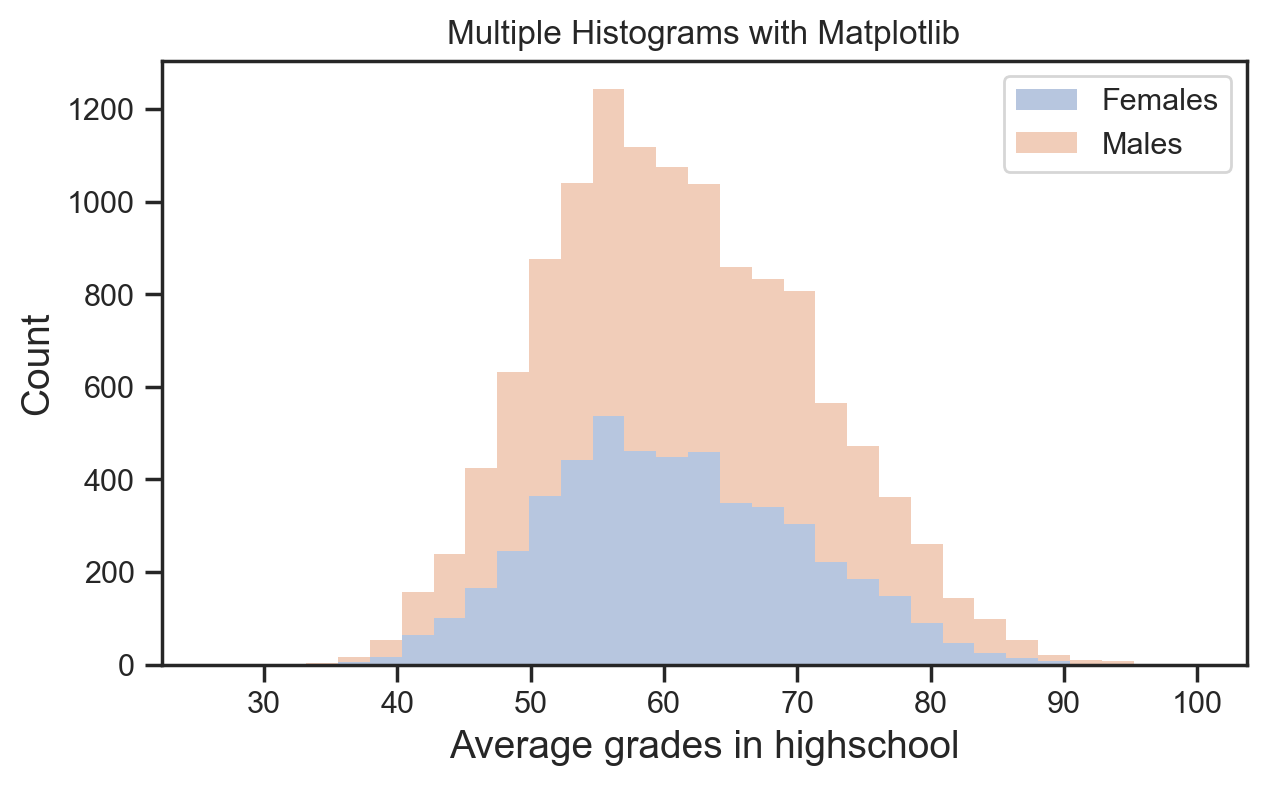

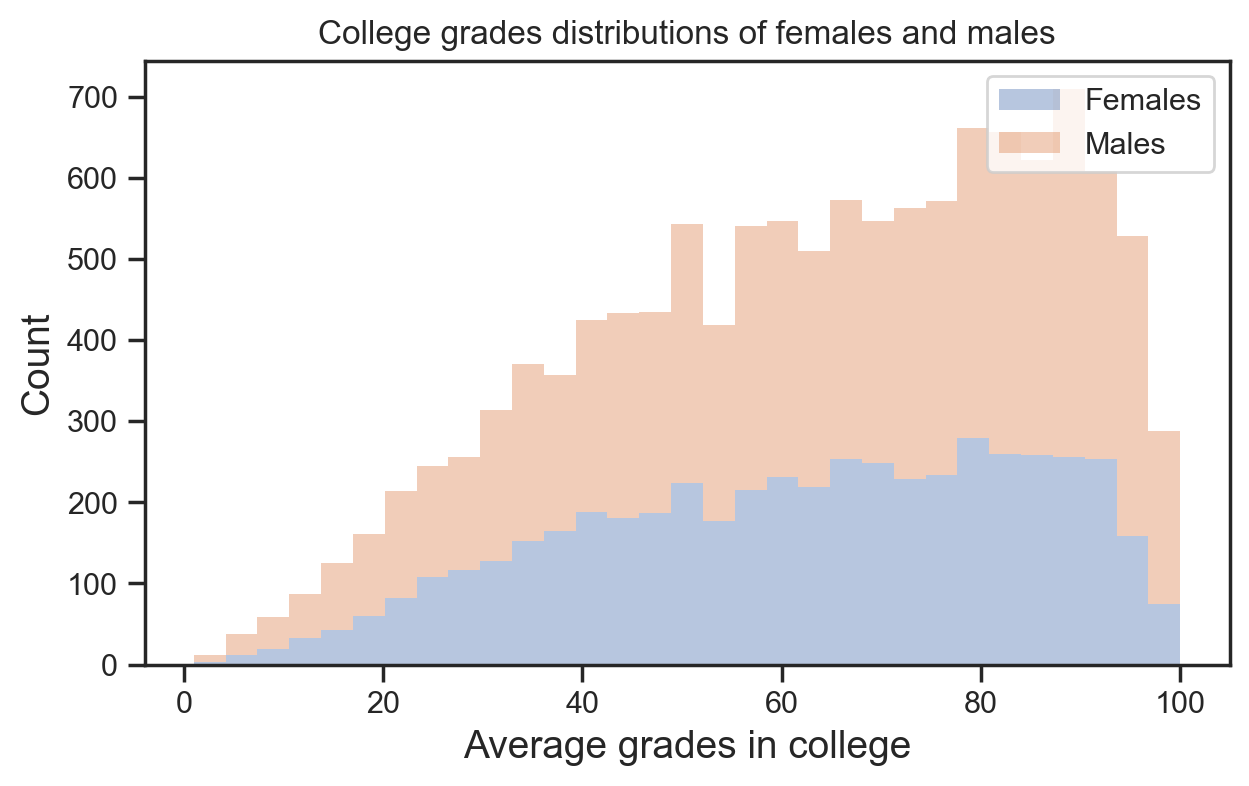

In [10]:
# Men and women highschool grades average histograms
# plt.figure(figsize=(8,6))
men = df[df.GENDER=='M'][['GENDER','HI_GRADE_AVG']]
women = df[df.GENDER=='F'][['GENDER','HI_GRADE_AVG']]
fig,ax = plt.subplots()
plt.hist([women.HI_GRADE_AVG, men.HI_GRADE_AVG], 31, histtype='barstacked', density=False, alpha=0.4, edgecolor='none', label=['Females','Males'])

plt.xlabel("Average grades in highschool", size=14)
plt.ylabel("Count", size=14)
plt.title("Multiple Histograms with Matplotlib")
plt.legend(loc='upper right')


# Men and women college grades average histograms
# plt.figure(figsize=(8,6))
men = df[df.GENDER=='M'][['GENDER','COL_GRADE_AVG']]
women = df[df.GENDER=='F'][['GENDER','COL_GRADE_AVG']]
fig,ax = plt.subplots()
plt.hist([women.COL_GRADE_AVG, men.COL_GRADE_AVG], 31, histtype='barstacked', density=False, alpha=0.4, edgecolor='none', label=['Females','Males'])
#TODO legend added

plt.xlabel("Average grades in college", size=14)
plt.legend()
plt.ylabel("Count", size=14)
plt.title("College grades distributions of females and males")
plt.legend(loc='upper right')


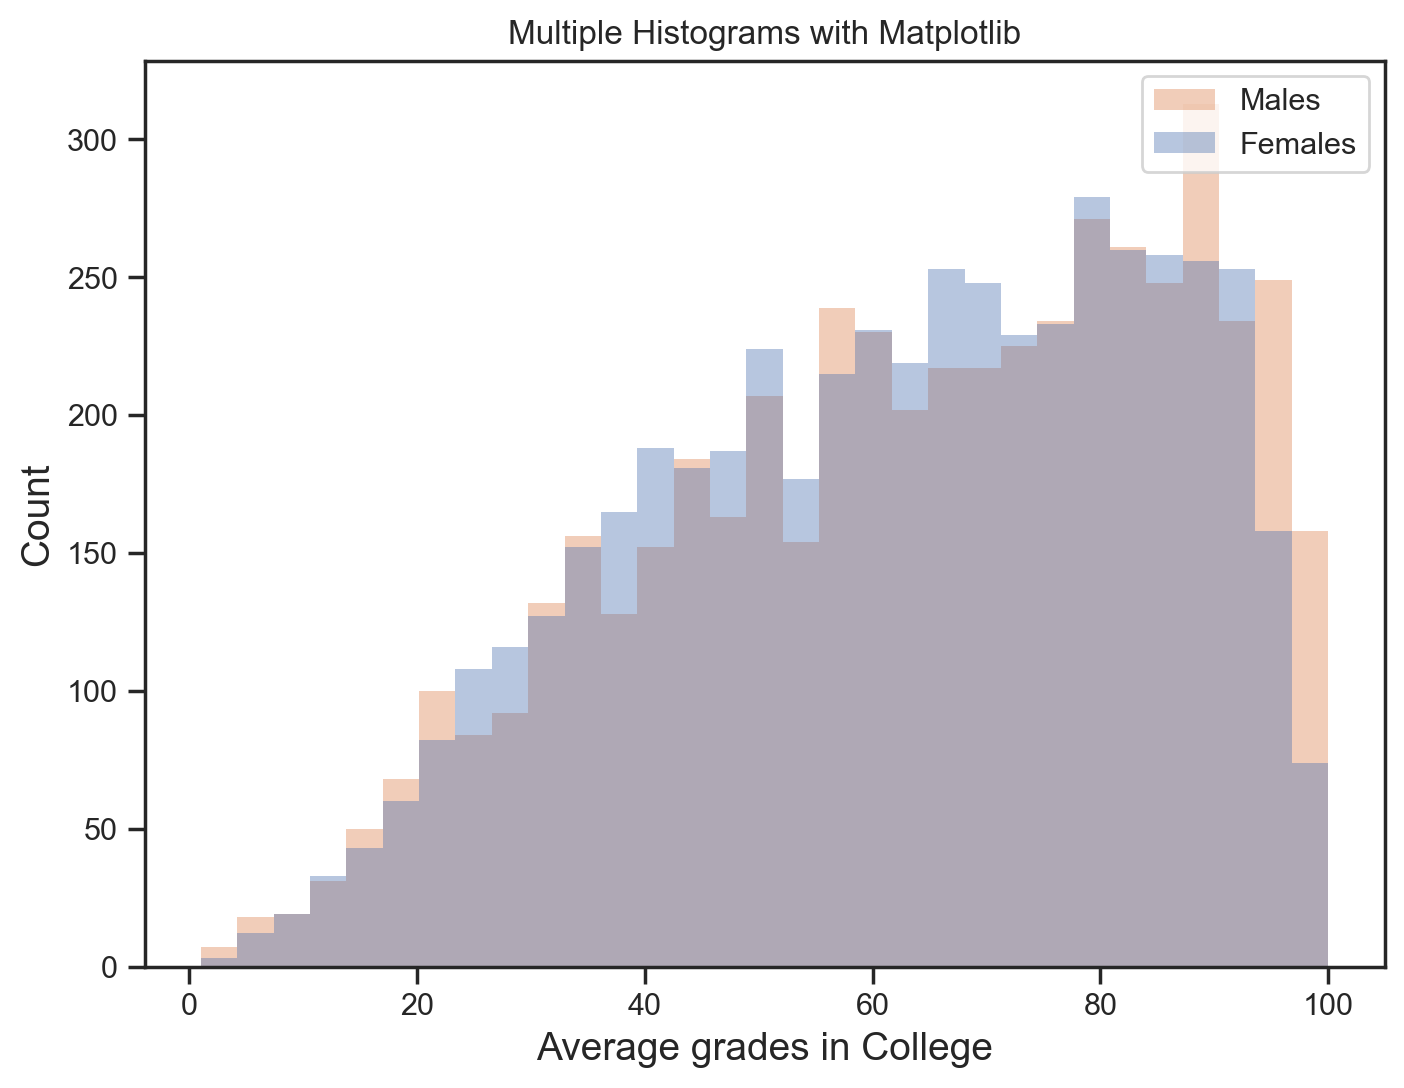

In [11]:
#Men and women college average grades histogram equal amount of data
plt.figure(figsize=(8,6))
men = df[df.GENDER=='M'][['GENDER','COL_GRADE_AVG']]
women = df[df.GENDER=='F'][['GENDER','COL_GRADE_AVG']]

d1 = women.COL_GRADE_AVG
d2 = men.COL_GRADE_AVG

y1 = women['COL_GRADE_AVG'].sample(n=len(women.COL_GRADE_AVG), random_state=1)
y2 = men['COL_GRADE_AVG'].sample(n=len(women.COL_GRADE_AVG), random_state=1)

plt.hist([y1, y2], 31, histtype='stepfilled', density=False, alpha=0.4, edgecolor='none', label=['Females','Males'])

plt.xlabel("Average grades in College", size=14)
plt.ylabel("Count", size=14)
plt.title("Multiple Histograms with Matplotlib")
plt.legend(loc='upper right')

In [23]:
df

,Unnamed: 0,GENDER,STRATUM,CR_S11,CC_S11,ENG_S11,CR_PRO,CC_PRO,ENG_PRO,COL_GRADE_AVG_org,HI_GRADE_AVG_org,GENDER_bin,COL_GRADE_AVG,HI_GRADE_AVG
0,0,F,Stratum 4,81,61,82,93,71,93,85.666667,74.666667,1,0.995599,1.371666
1,1,F,Stratum 5,75,66,88,38,86,98,74.000000,76.333333,1,0.484028,1.540112
2,2,M,Stratum 2,49,38,42,1,18,43,20.666667,43.000000,0,-1.854585,-1.828806
3,3,F,Stratum 2,55,51,73,35,76,80,63.666667,59.666667,1,0.030921,-0.144347
4,4,M,Stratum 4,65,76,92,94,98,100,97.333333,77.666667,0,1.507171,1.674869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12406,12406,M,Stratum 2,69,70,81,71,86,87,81.333333,73.333333,0,0.805587,1.236910
12407,12407,M,Stratum 2,57,61,53,39,44,11,31.333333,57.000000,0,-1.386863,-0.413860
12408,12408,M,Stratum 2,69,75,58,88,90,81,86.333333,67.333333,0,1.024832,0.630504
12409,12409,F,Stratum 3,69,64,52,80,51,8,46.333333,61.666667,1,-0.729128,0.057788


In [22]:
import seaborn as sns
sns.set(style='ticks')

df = pd.read_csv("df_sum_score_standardized.csv")
# df_temp = df.HI_GRADE_AVG.sort_values(ascending=False, inplace=False, kind='quicksort')

# # #Uncomment this if you want the histograms
# #Histogram for women
# women = df[df.GENDER=='F'][['GENDER','COL_GRADE_AVG']]
# bins = np.linspace(min(women.COL_GRADE_AVG),max(women.COL_GRADE_AVG), 60)
# histwomen, edges = np.histogram(women.COL_GRADE_AVG, bins=bins, density=False)
# x = (edges[1:]+edges[:-1])/2
# width=bins[1]-bins[0]
# fig,ax = plt.subplots()
# ax.bar(x,histwomen,width=width*0.9)
# ax.set_xlabel('women')

# #Histgram for men
# men = df[df.GENDER=='M'][['GENDER','COL_GRADE_AVG']]
# bins = np.linspace(min(men.COL_GRADE_AVG),max(men.COL_GRADE_AVG), 60)
# histmen, edges = np.histogram(men.COL_GRADE_AVG, bins=bins, density=False)
# x = (edges[1:]+edges[:-1])/2
# width=bins[1]-bins[0]
# fig,ax = plt.subplots()
# ax.bar(x,histmen,width=width*0.9)
# ax.set_xlabel('men')


# #parameterise our distributions
d1 = sps.norm(women.HI_GRADE_AVG.mean(),women.HI_GRADE_AVG.std())
d2 = sps.norm(men.HI_GRADE_AVG.mean(),men.HI_GRADE_AVG.std())

#sample values from above distributions
# random variates from d1 and d2
y1 = d1.rvs(len(women.HI_GRADE_AVG))
y2 = d2.rvs(len(women.HI_GRADE_AVG))

d1 = women.COL_GRADE_AVG
d2 = men.COL_GRADE_AVG

y1 = women['COL_GRADE_AVG'].sample(n=len(women.COL_GRADE_AVG), random_state=1)
y2 = men['COL_GRADE_AVG'].sample(n=len(women.COL_GRADE_AVG), random_state=1)

# combine mixture
ys = np.concatenate([y1, y2])

# create new figure with size given explicitly
plt.figure(figsize=(10, 6))

# add histogram showing individual components
# plt.hist([y1, y2], 51, histtype='barstacked', density=True, alpha=0.4, edgecolor='none')
plt.hist([y1, y2], 31, histtype='barstacked', density=False, alpha=0.4, edgecolor='none', label=['Females','Males'])

# get X limits and fix them
mn, mx = plt.xlim()
plt.xlim(mn, mx)

# add our distributions to figure
x = np.linspace(mn, mx, 301)
d1 = sps.norm(women.COL_GRADE_AVG.mean(),women.COL_GRADE_AVG.std())
d2 = sps.norm(men.COL_GRADE_AVG.mean(),men.COL_GRADE_AVG.std())
plt.plot(x, d1.pdf(x) * (len(y1) / len(ys)), color='C0', ls='--', label='Females')
plt.plot(x, d2.pdf(x) * (len(y2) / len(ys)), color='C1', ls='--', label='Males')

# ax1 = d1.plot.kde()
# # plt.plot(x,d1.plot.kde()* (len(y1) / len(ys)), color='C0', ls='--', label='Women')
# ax2 = d2.plot.kde()


# estimate Kernel Density and plot
kde = sps.gaussian_kde(ys)
plt.plot(x, kde.pdf(x), label='Cummulative distribution')

# finish up
plt.legend()
plt.ylabel('Probability density')
sns.despine()

AttributeError: 'DataFrame' object has no attribute 'COL_GRADE_AVG'

# Hghschool grades for every stratum histograms

Would it be better to have the highschool and college grades mean? 

Text(0.5, 0, 'Str 1')

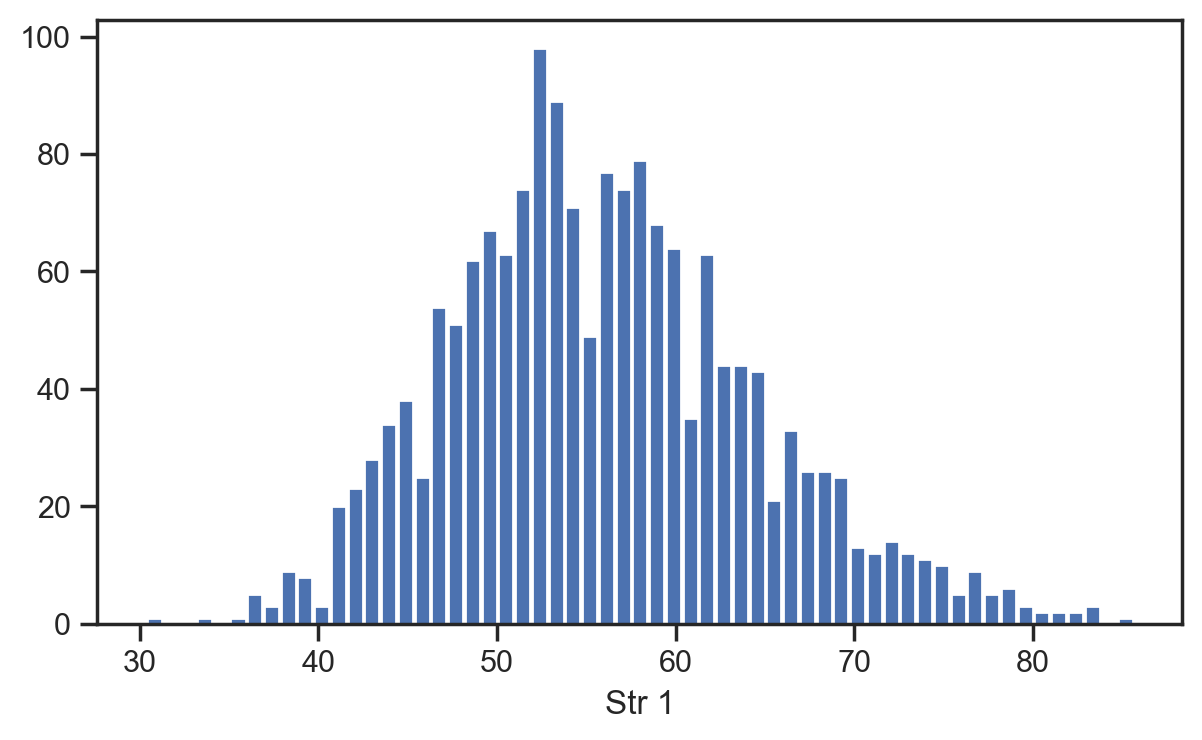

In [24]:
# Men and women highschool grades average histograms
# plt.figure(figsize=(8,6))
df = pd.read_csv("df_sum_score_standardized.csv")

# Stratum1 = df[df.STRATUM=='Stratum 1'][['STRATUM','HI_GRADE_AVG']]
# Stratum2 = df[df.STRATUM=='Stratum 2'][['STRATUM','HI_GRADE_AVG']]
# Stratum3 = df[df.STRATUM=='Stratum 3'][['STRATUM','HI_GRADE_AVG']]
# Stratum4 = df[df.STRATUM=='Stratum 4'][['STRATUM','HI_GRADE_AVG']]
# Stratum5 = df[df.STRATUM=='Stratum 5'][['STRATUM','HI_GRADE_AVG']]
# Stratum6 = df[df.STRATUM=='Stratum 6'][['STRATUM','HI_GRADE_AVG']]


# fig,ax = plt.subplots()
# plt.hist([Stratum1.HI_GRADE_AVG, Stratum2.HI_GRADE_AVG,Stratum3.HI_GRADE_AVG,Stratum4.HI_GRADE_AVG,Stratum5.HI_GRADE_AVG,Stratum6.HI_GRADE_AVG], 31, histtype='barstacked', density=False, alpha=0.4, edgecolor='none', label=['Stratum1','Stratum2','Stratum3','Stratum4','Stratum5','Stratum6'])

# plt.xlabel("Average grades in highschool", size=11)
# plt.ylabel("Count", size=11)
# plt.title("Highschool grades histograms of each level of Stratum ")
# plt.legend(loc='upper right')




# ##OTHER 
import seaborn as sns
sns.set(style='ticks')

df = pd.read_csv("df_sum_score.csv")
# df_temp = df.HI_GRADE_AVG.sort_values(ascending=False, inplace=False, kind='quicksort')

#Histogram for women
Stratum1 = df[df.STRATUM=='Stratum 1'][['STRATUM','HI_GRADE_AVG']]
# str1 = df[df.GENDER=='F'][['GENDER','HI_GRADE_AVG']]
bins = np.linspace(min(Stratum1.HI_GRADE_AVG),max(Stratum1.HI_GRADE_AVG), 60)
histwomen, edges = np.histogram(Stratum1.HI_GRADE_AVG, bins=bins, density=False)
x = (edges[1:]+edges[:-1])/2
width=bins[1]-bins[0]
fig,ax = plt.subplots()
ax.bar(x,histwomen,width=width*0.9)
ax.set_xlabel('Str 1')





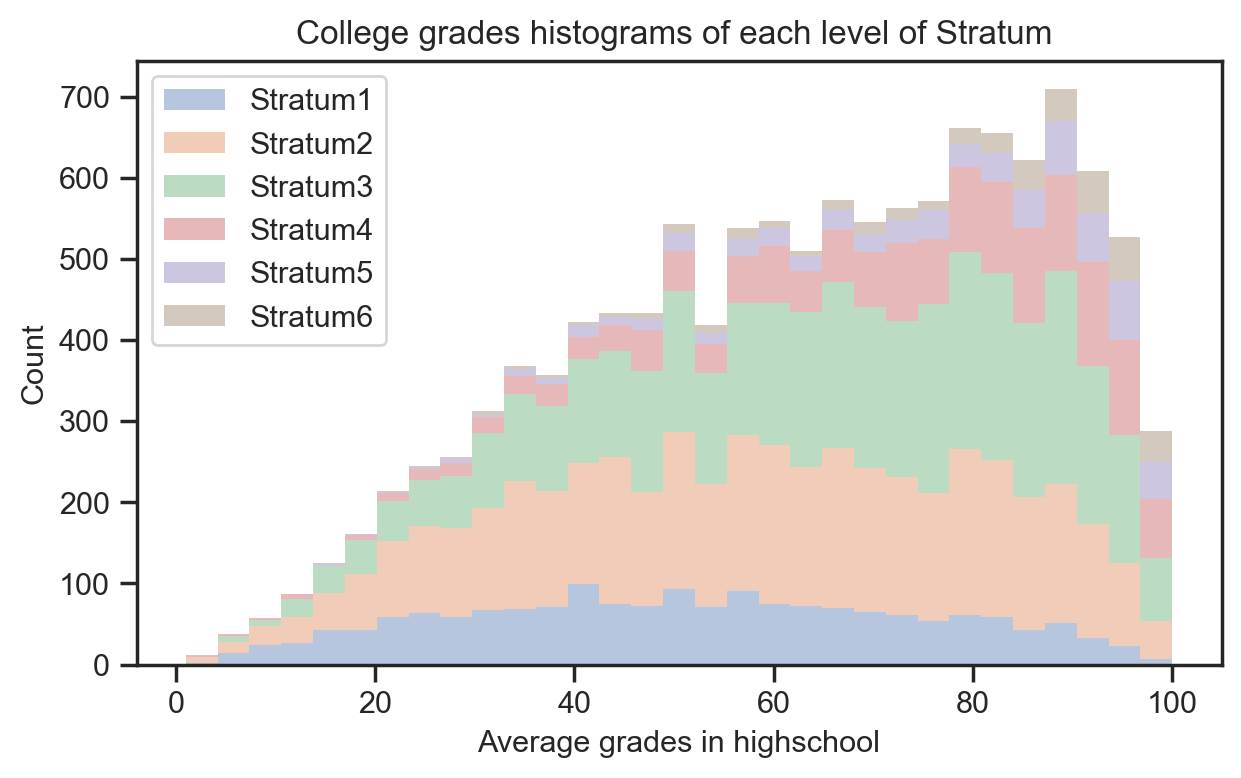

In [25]:

# Men and women college grades average histograms
Stratum1 = df[df.STRATUM=='Stratum 1'][['STRATUM','COL_GRADE_AVG']]
Stratum2 = df[df.STRATUM=='Stratum 2'][['STRATUM','COL_GRADE_AVG']]
Stratum3 = df[df.STRATUM=='Stratum 3'][['STRATUM','COL_GRADE_AVG']]
Stratum4 = df[df.STRATUM=='Stratum 4'][['STRATUM','COL_GRADE_AVG']]
Stratum5 = df[df.STRATUM=='Stratum 5'][['STRATUM','COL_GRADE_AVG']]
Stratum6 = df[df.STRATUM=='Stratum 6'][['STRATUM','COL_GRADE_AVG']]

fig,ax = plt.subplots()
plt.hist([Stratum1.COL_GRADE_AVG, Stratum2.COL_GRADE_AVG,Stratum3.COL_GRADE_AVG,Stratum4.COL_GRADE_AVG,Stratum5.COL_GRADE_AVG,Stratum6.COL_GRADE_AVG], 31, histtype='barstacked', density=False, alpha=0.4, edgecolor='none', label=['Stratum1','Stratum2','Stratum3','Stratum4','Stratum5','Stratum6'])

plt.xlabel("Average grades in highschool", size=11)
plt.ylabel("Count", size=11)
plt.title("College grades histograms of each level of Stratum ")
plt.legend(loc='upper left')
plt.show()

# # plt.figure(figsize=(8,6))
# men = df[df.GENDER=='M'][['GENDER','COL_GRADE_AVG']]
# women = df[df.GENDER=='F'][['GENDER','COL_GRADE_AVG']]
# fig,ax = plt.subplots()
# plt.hist([women.COL_GRADE_AVG, men.COL_GRADE_AVG], 31, histtype='barstacked', density=False, alpha=0.4, edgecolor='none', label=['Females','Males'])
# #TODO legend added

# plt.xlabel("Average grades in highschool", size=14)
# plt.legend()
# plt.ylabel("Count", size=14)
# plt.title("College grades distributions of females and males")
# plt.legend(loc='upper right')

In [26]:
df_temp = df.copy()
x = df_temp.HI_GRADE_AVG
g = df_temp.STRATUM
df_kat = pd.DataFrame(dict(x=x, g=g))
df_kat_order = df_kat.groupby(["g"]).count()

df_kat_order = df_kat_order.sort_values(by="g", ascending=True)
df_kat_order

,x
g,
0,14
Stratum 1,1709
Stratum 2,4029
Stratum 3,4045
Stratum 4,1578
Stratum 5,633
Stratum 6,403


# Highschool and college grades distributions 

Vær opmærksom på, at disse ikke viser, hvor mange studerende, der er i hver gruppe. De viser frequnecy af karakterer i hver gruppe. 

/Users/gabriellakierulff/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/Users/gabriellakierulff/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/Users/gabriellakierulff/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/Users/gabriellakierulff/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.ti

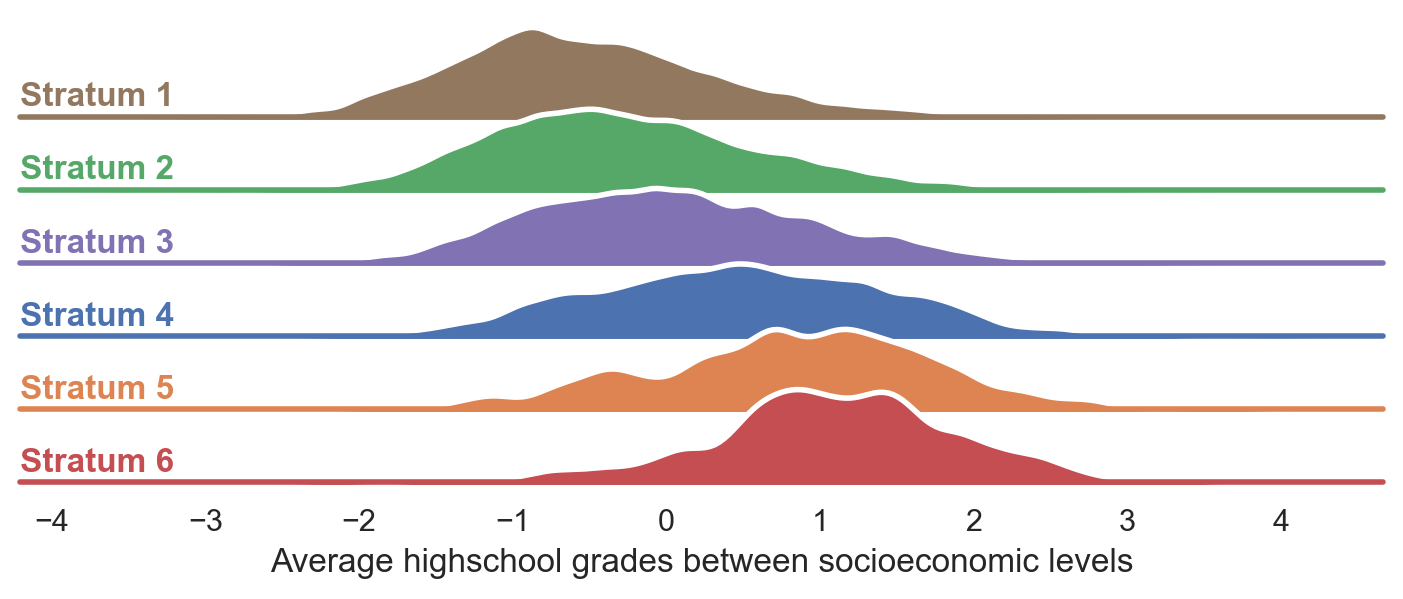

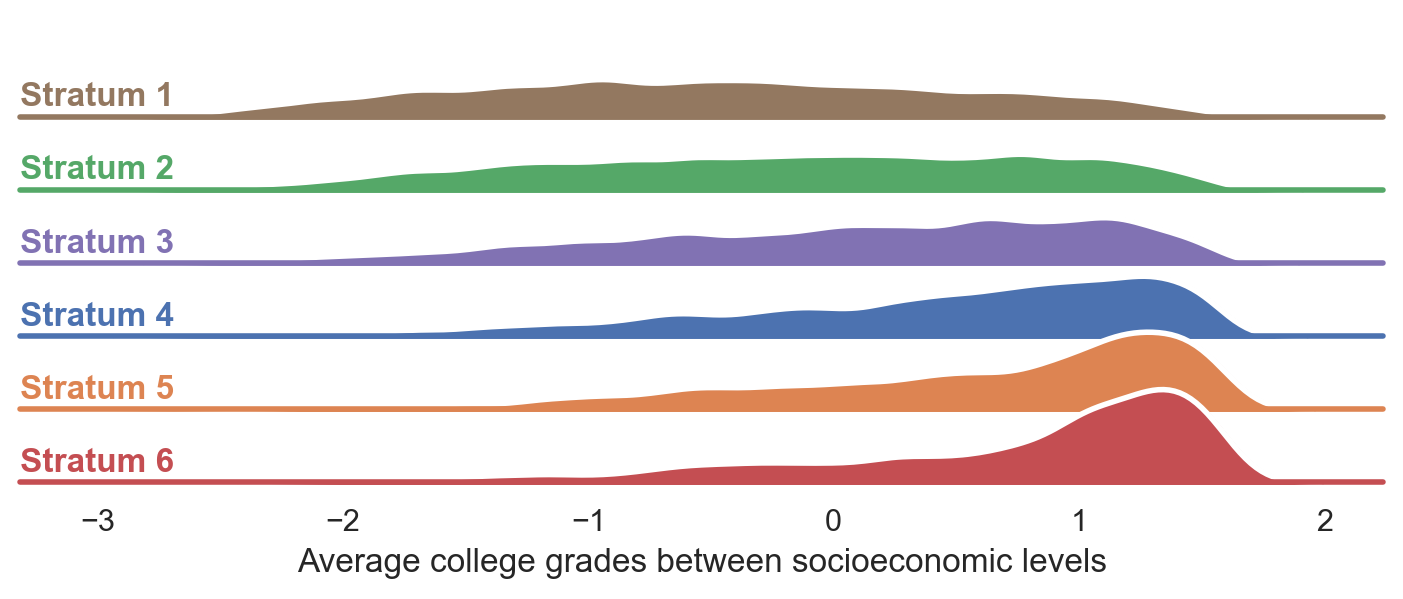

In [27]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

df = pd.read_csv("df_sum_score_standardized.csv")
df = df[df.STRATUM!='0']

def Ridgeline_dists(df,x, metric="",plot_label=""):
    df_temp = df.copy()
    x = x 
    g = df_temp.STRATUM
    df_kat = pd.DataFrame(dict(x=x, g=g))
    df_kat_order = df_kat.groupby(["g"]).count()

    # df_kat_order = df_kat_order.sort_values(by="g", ascending=True).index
    # df_kat_order = df_kat_order.sort_values(by=df_temp.STRATUM, axis=0)
    # df_kat_order = df_kat_order.sort_values(by=['Stratum 1','Stratum 2','Stratum 3','Stratum 4','Stratum 5','Stratum 6'])

    # Initialize the FacetGrid object
    pal = sns.cubehelix_palette(10, rot=-0.25, light=0.7)
    g = sns.FacetGrid(
        df_kat,
        row="g",
        hue="g",
        aspect=15,
        height=0.5,
        row_order = ['Stratum 1','Stratum 2','Stratum 3','Stratum 4','Stratum 5','Stratum 6'],
        # palette=pal # Denne gør den i de 2 blå farver
    )

    # Draw the densities in a few steps
    g.map(sns.kdeplot, "x", bw_adjust=0.5, clip_on=False, fill=True, alpha=1, linewidth=1.5)#, order =['Stratum 1','Stratum 2','Stratum 3','Stratum 4','Stratum 5','Stratum 6'])
    g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=0.5)#,order=['Stratum 1','Stratum 2','Stratum 3','Stratum 4','Stratum 5','Stratum 6'])
    g.map(plt.axhline, y=0, lw=2, clip_on=False)#, order=['Stratum 1','Stratum 2','Stratum 3','Stratum 4','Stratum 5','Stratum 6'])

    # Define and use a simple function to label the plot in axes coordinates
    def label(x, color, label):
        ax = plt.gca()
        ax.text(
            0,
            0.2,
            label,
            fontweight="bold",
            color=color,
            ha="left",
            va="center",
            transform=ax.transAxes
        )

    g.map(label, "x")#, order = ['Stratum 1','Stratum 2','Stratum 3','Stratum 4','Stratum 5','Stratum 6'])

    g.set_xlabels(plot_label)

    # Set the subplots to overlap
    g.fig.subplots_adjust(hspace=-0.25)

    # Remove axes details that don't play well with overlap
    g.set_titles("")
    g.set(yticks=[])
    g.despine(bottom=True, left=True)
    

Ridgeline_dists(df,x=df.HI_GRADE_AVG,plot_label='Average highschool grades between socioeconomic levels')
Ridgeline_dists(df,x=df.COL_GRADE_AVG,plot_label='Average college grades between socioeconomic levels')

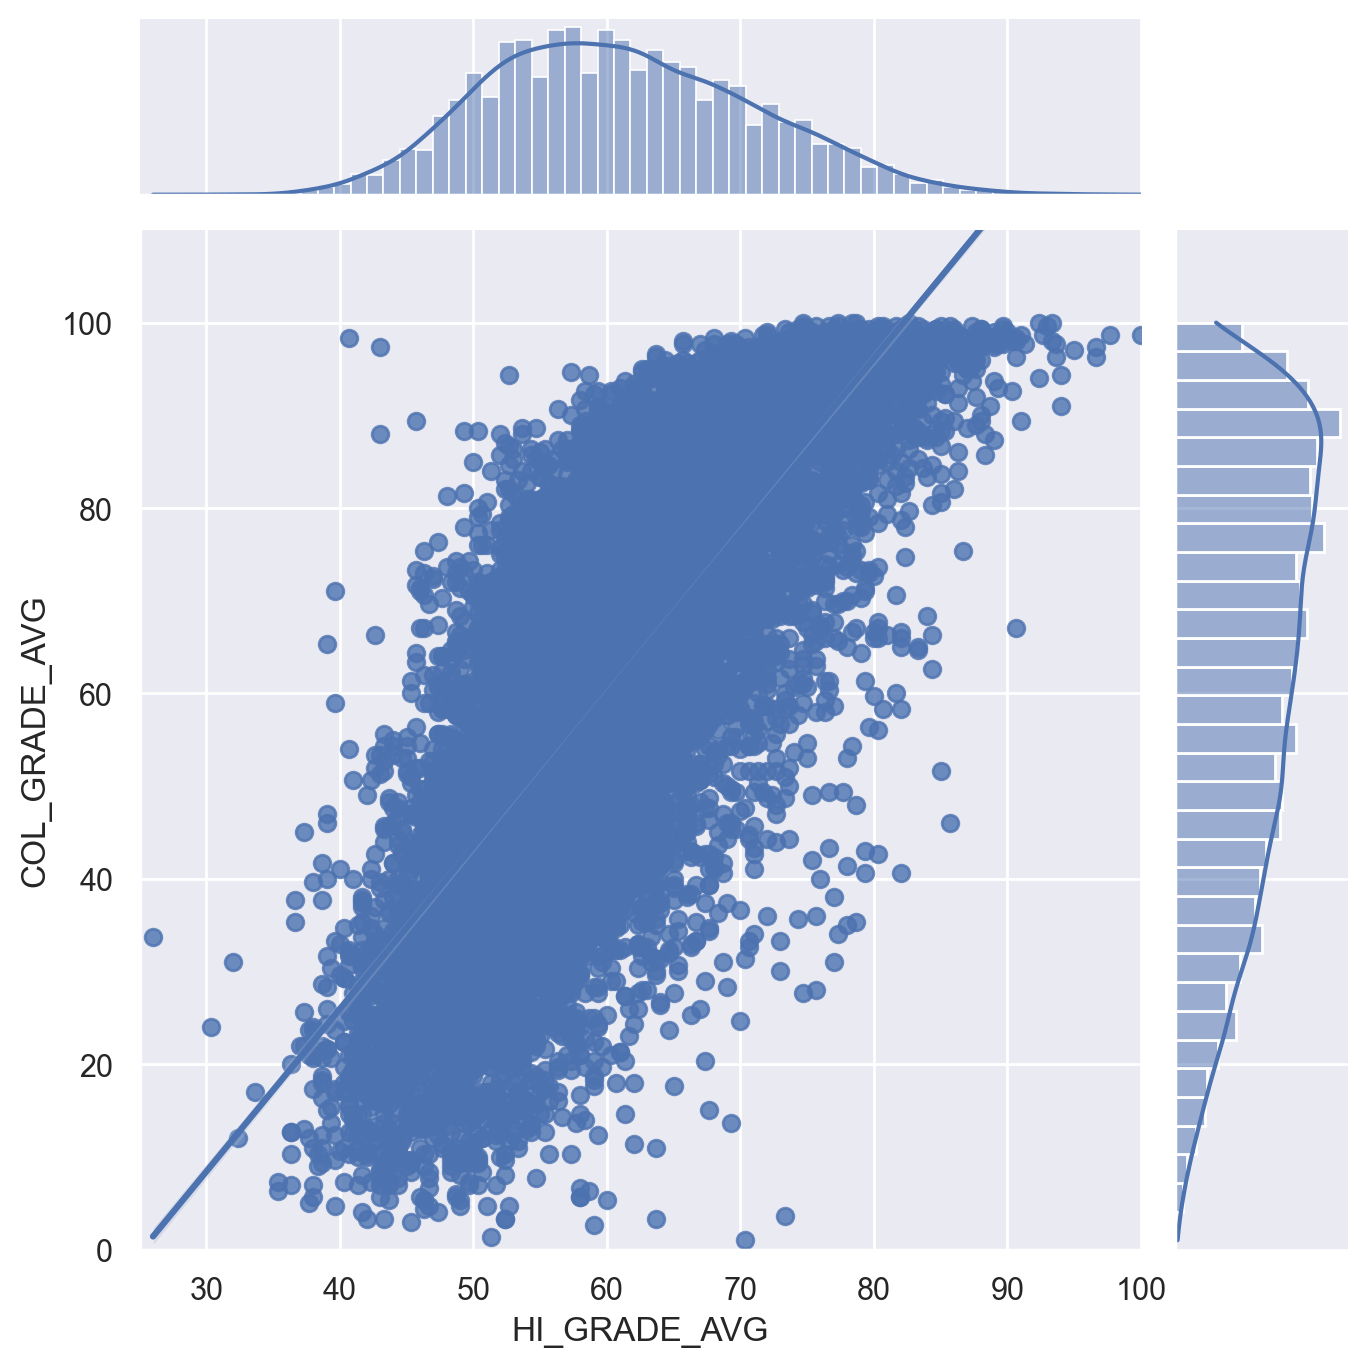

In [8]:
sns.set_theme(style="darkgrid")
df = pd.read_csv("df_sum_score.csv")

x = df.HI_GRADE_AVG 
y=df.COL_GRADE_AVG
g = sns.jointplot(x=x, y=y, data=df, kind="reg", truncate=True,xlim=(25, 100), ylim=(0, 110),height=7)

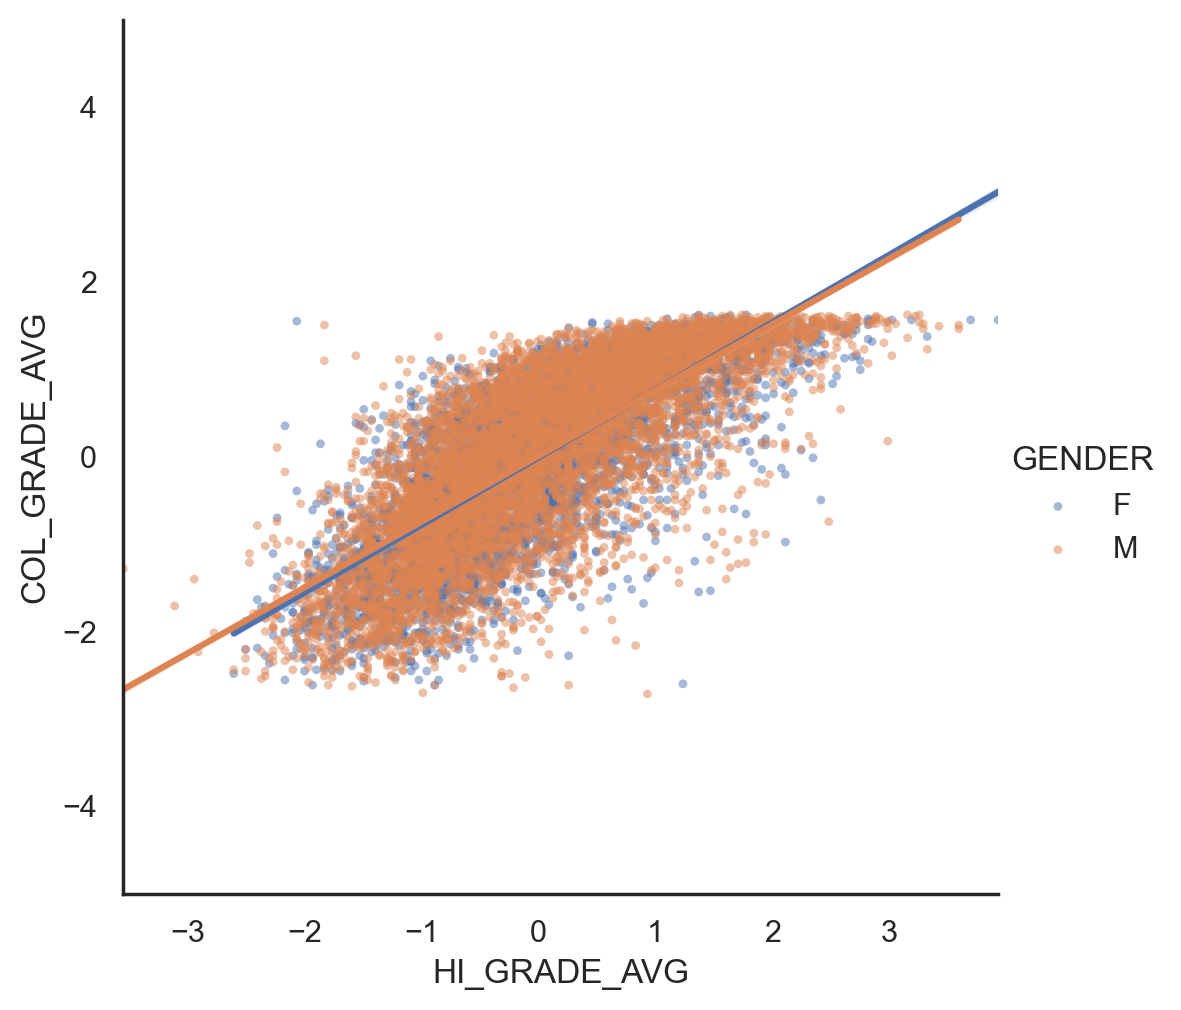

In [30]:
df = pd.read_csv("df_sum_score_standardized.csv")
# pal = sns.color_palette("pastel", desat=1)
g=sns.lmplot(x='HI_GRADE_AVG', y='COL_GRADE_AVG', hue='GENDER', scatter_kws={'alpha':0.5,"s": 10,'edgecolor':'None'}, data=df);
g.set(ylim=(-5, 5))

### Make above plot as 6 heatmaps per startum

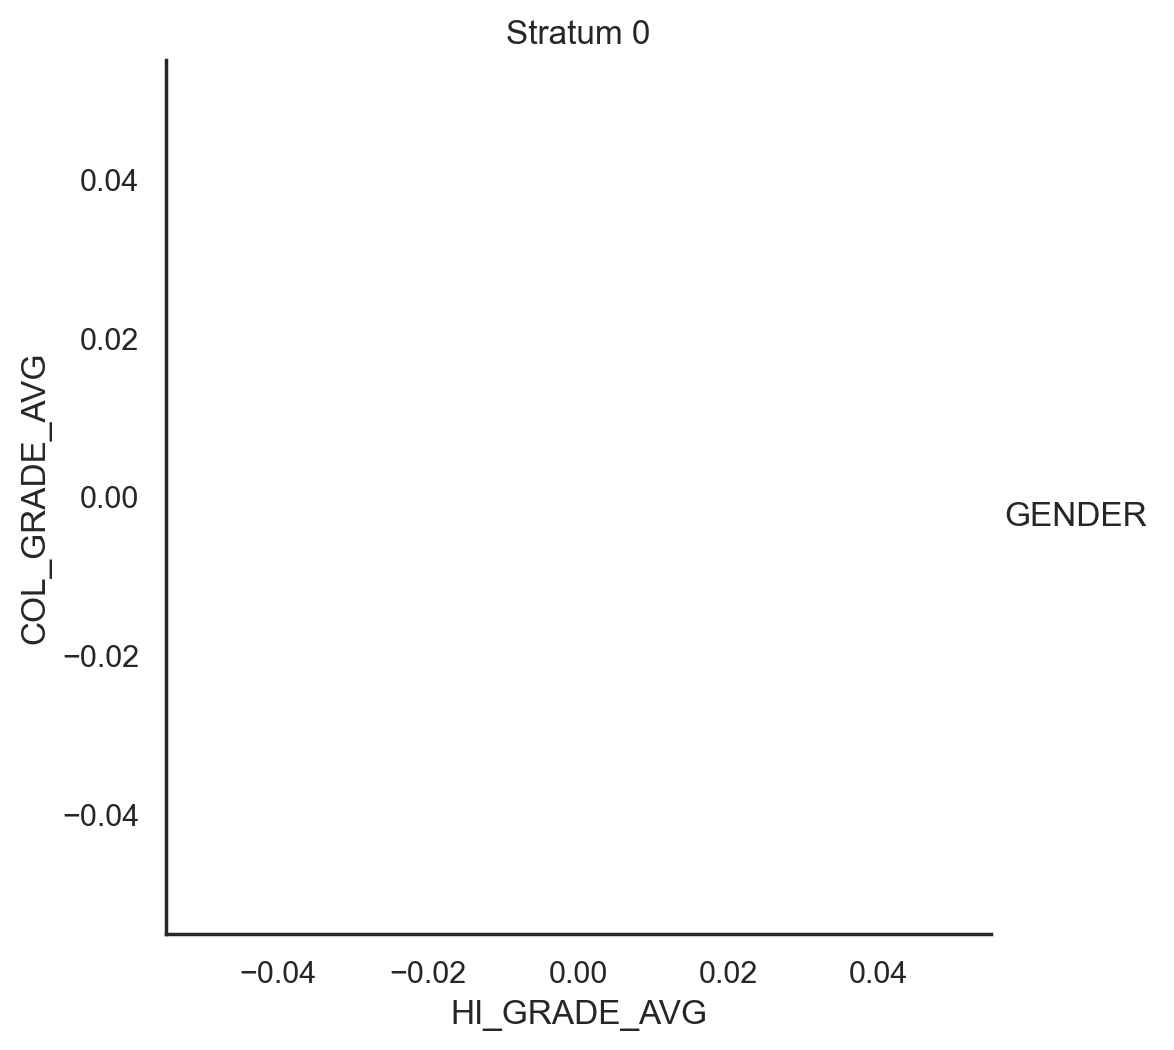

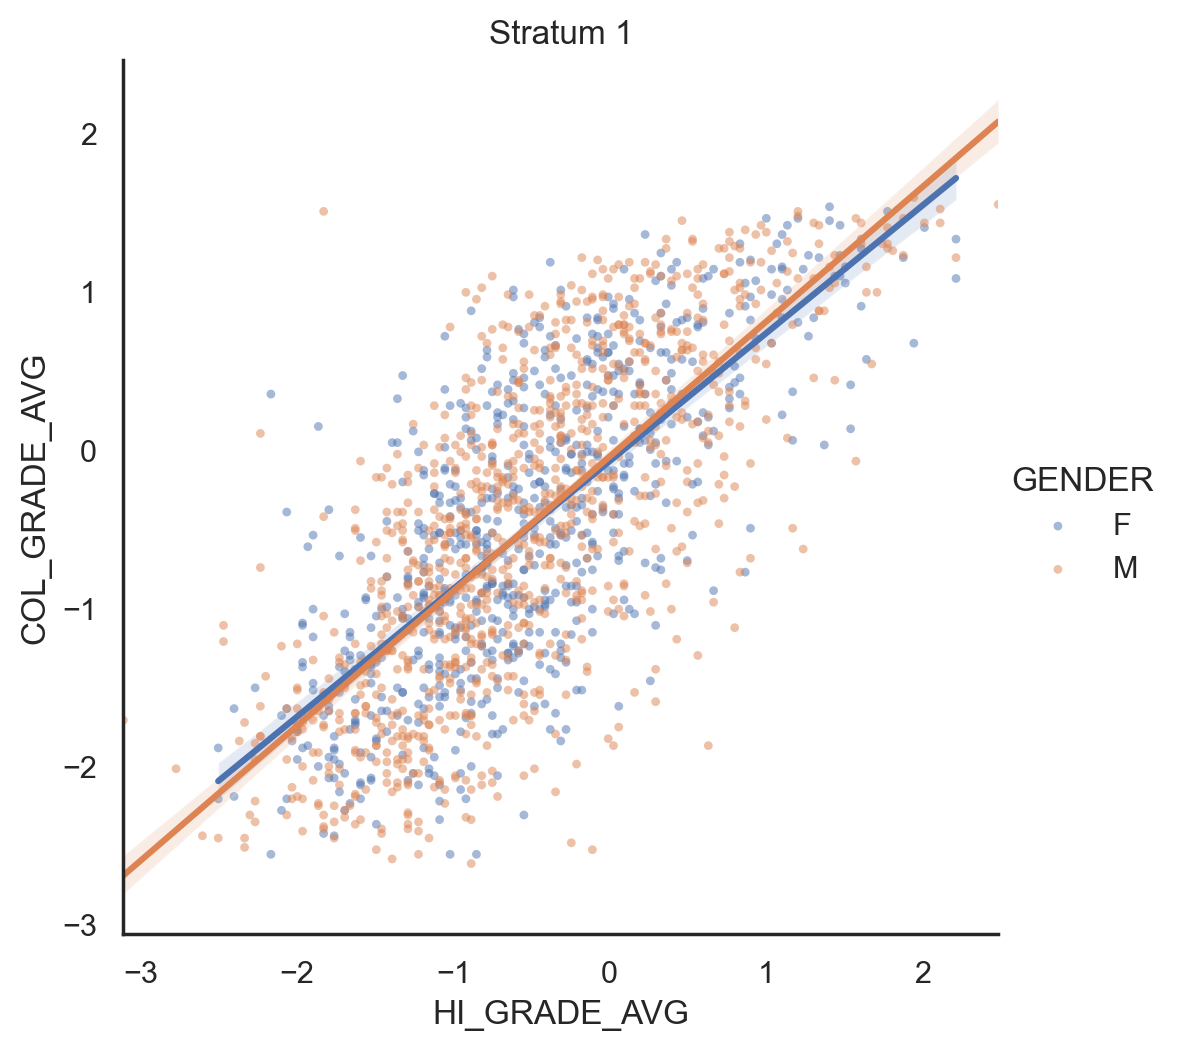

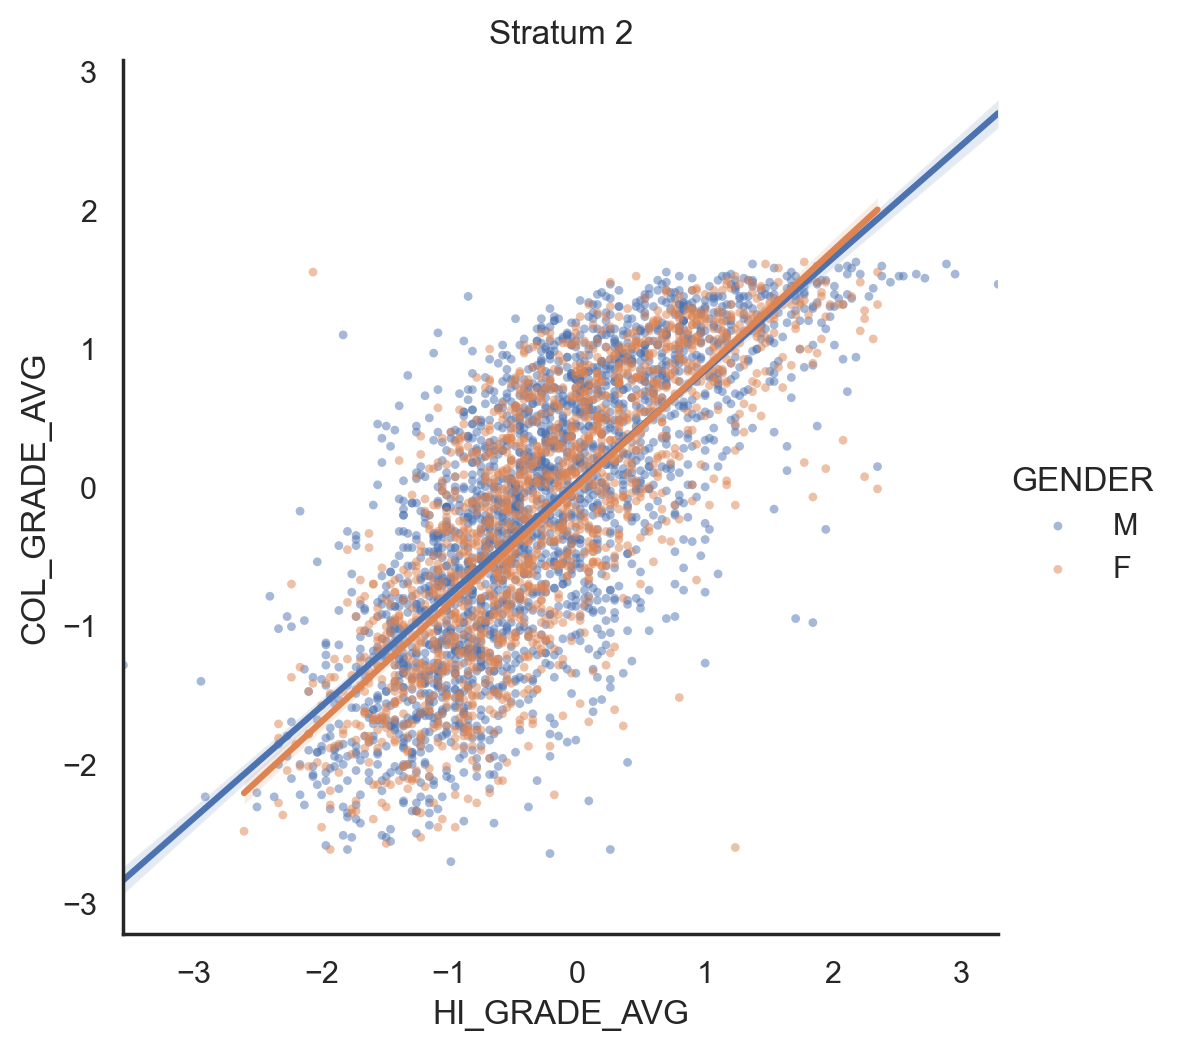

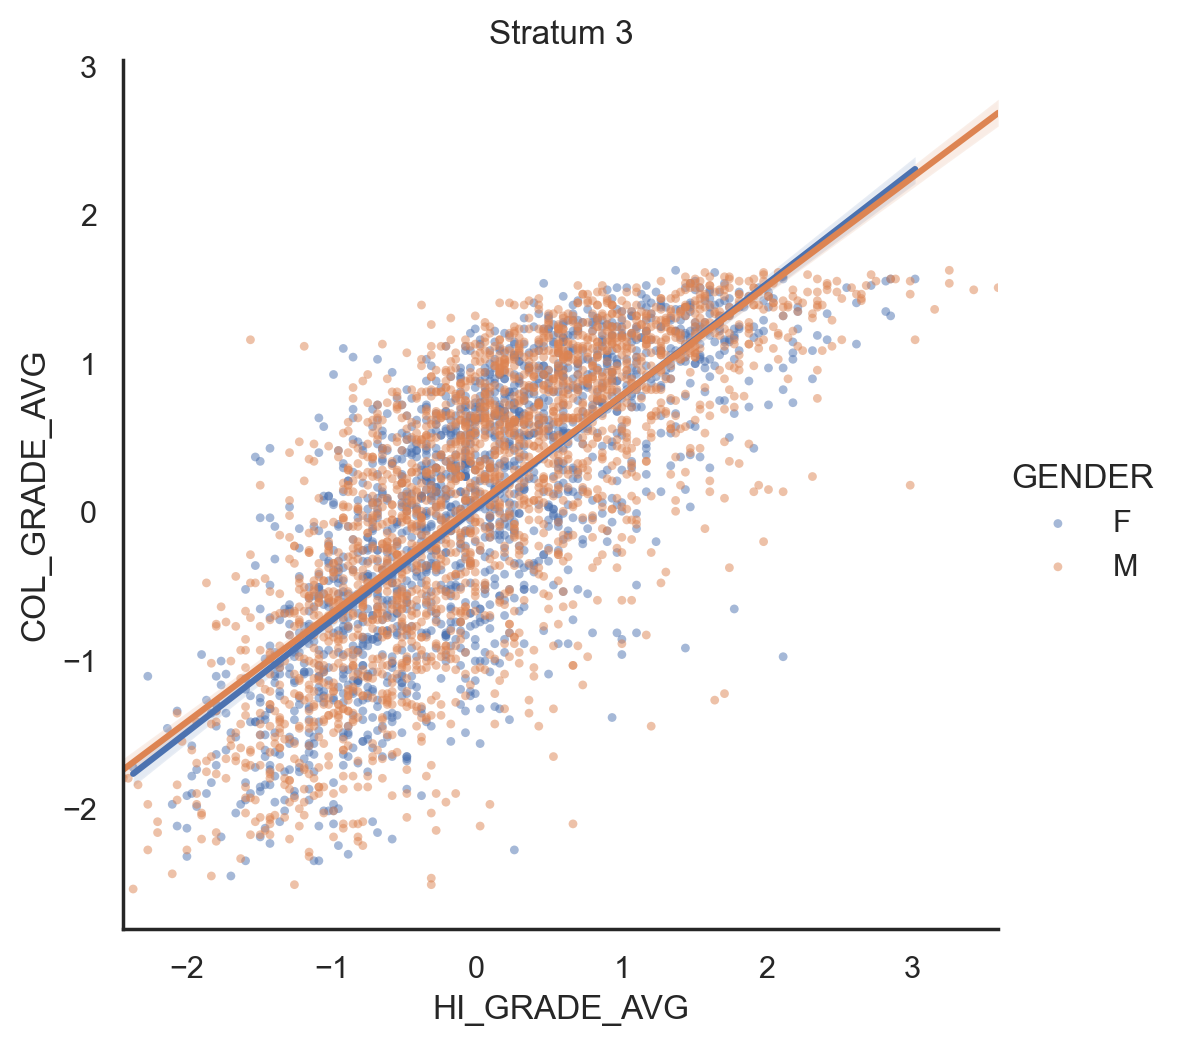

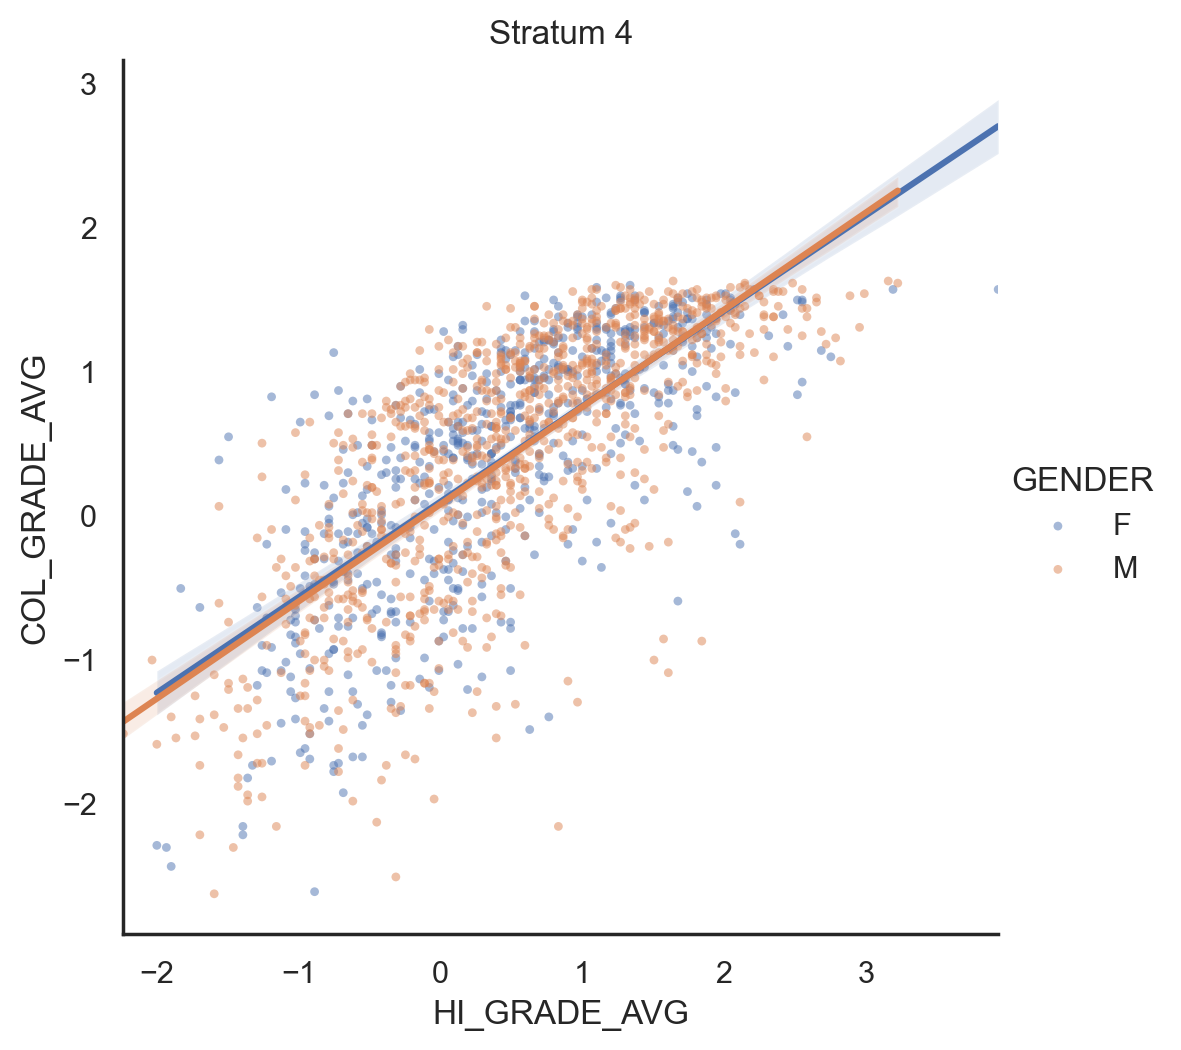

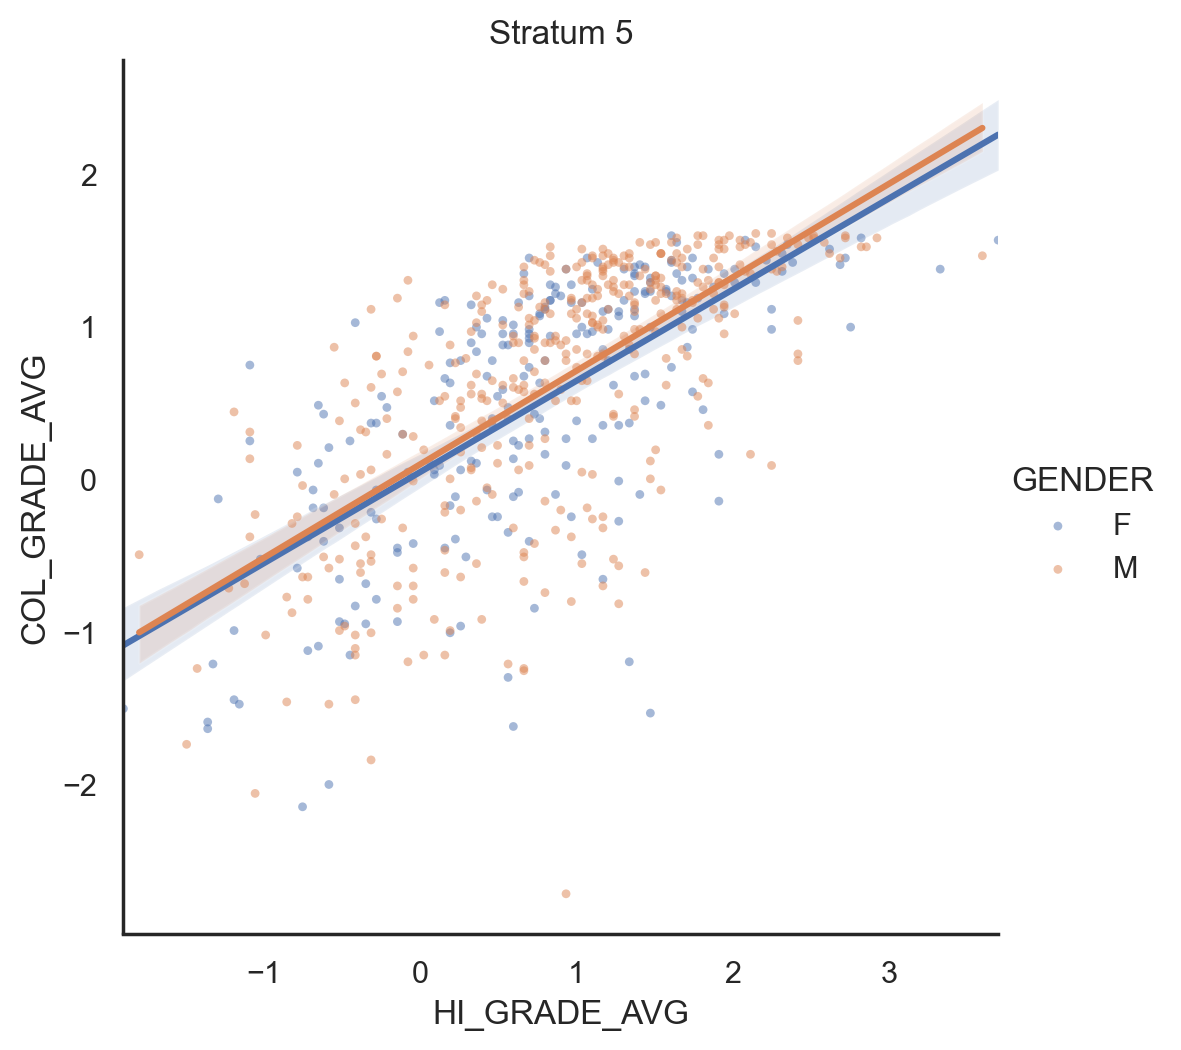

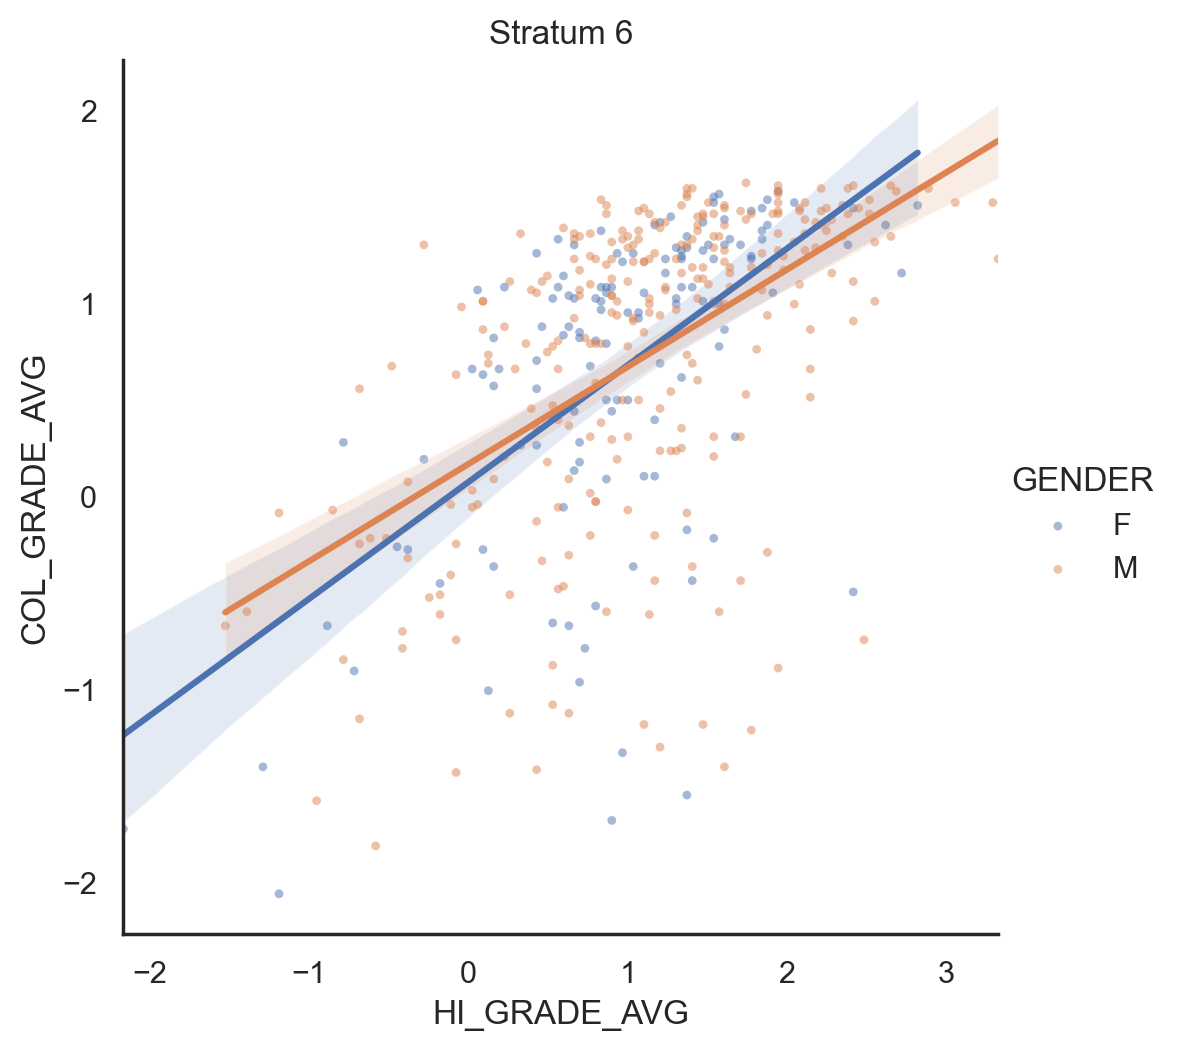

In [31]:
# pal = sns.color_palette("pastel", desat=1)
for i in range(df.STRATUM.nunique()):
    sns.lmplot(x='HI_GRADE_AVG', y='COL_GRADE_AVG', hue='GENDER', scatter_kws={'alpha':0.5,"s": 10,'edgecolor':'None'}, data=df[df.STRATUM == "Stratum {}".format(i)]).set(title="Stratum {}".format(i))
    #g.set(ylim=(0, 108))
    plt.show()

In [17]:
df.STRATUM.unique()

array(['Stratum 4', 'Stratum 5', 'Stratum 2', 'Stratum 6', 'Stratum 3',
       'Stratum 1', '0'], dtype=object)